In [1]:
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import pyplot as plt

import pandas as pd 
import numpy as np

(0.0, 12.5)

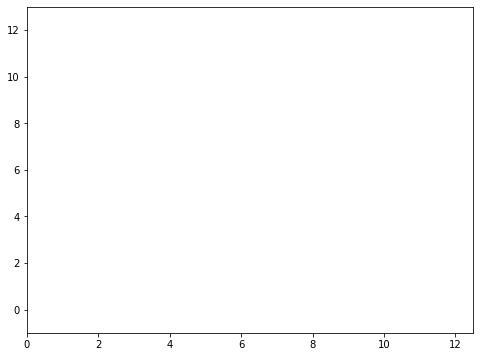

In [2]:
fig, ax= plt.subplots(figsize=(8,6))
rows = 12
cols = 17

ax.set_ylim(-1, rows+1)
ax.set_xlim(0, rows+0.5)


In [3]:
main = pd.read_csv(r"./data/comparison_table_9.csv")
main.head()

,smiles,Acet,MeCN,MeOH,DMF,EtOH,IPA,EtOAc,MeTHF,Tol,MTBE,Hept
0,C(#Cc1ccccc1)c1ccccc1,0.77,0.70,0.80,0.58,0.61,0.28,0.64,0.31,0.28,0.12,0.00
1,C1CC2=CC=CC=C2C1O,NaN,0.57,0.58,0.38,0.51,0.25,0.25,0.14,0.01,0.12,-0.14
2,CC(C)(CC(=C)C1=CC=CC=C1)C2=CC=CC=C2,0.96,0.98,0.99,0.88,0.97,0.83,0.59,0.81,0.55,-0.03,0.08
3,CCCCC(CC)COC(=O)C(C#N)=C(c1ccccc1)c1ccccc1,0.99,0.92,1.00,0.98,0.98,0.84,0.57,0.53,0.74,-0.12,-0.06
4,N#CC1=CC(F)=CC(F)=C1,0.67,0.84,0.66,NaN,0.32,0.01,0.44,0.19,0.15,-0.01,-0.09


In [4]:
data = np.array(main.iloc[:,1:])

In [5]:
solvents = ["Acet", "MeCN", "MeOH", "DMF", "EtOH", "IPA", "EtOAc", "MeTHF", "Tol", "MTBE", "Hept"]
solutes = range(len(data))

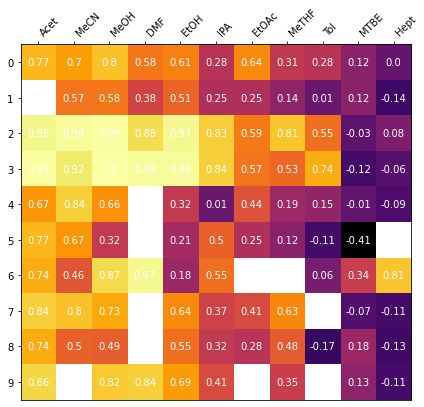

In [6]:
fig, ax = plt.subplots(figsize=(6,6), tight_layout=True)
im = ax.imshow(data, cmap='inferno')

ax.set_yticks(np.arange(len(solutes)), labels=solutes)
ax.set_xticks(np.arange(len(solvents)), labels=solvents)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=45, ha='left')
for i in range(len(solutes)):
    for j in range(len(solvents)):
        text = ax.text(j, i, data[i,j], ha='center', va='center', color='w')
plt.savefig(r'./figures/heatmap.svg', dpi=300)
plt.show()

In [6]:
import rdkit
from rdkit import Chem

In [7]:
mols = [Chem.MolFromSmiles(mol) for mol in main['smiles']]

In [8]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import os
from chemprop.utils import makedirs

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')



In [13]:

# save_path = os.path.join(args.bayes_path, target_name)
makedirs('./data/test/')
for indx,mol in enumerate(mols):
    svg = moltosvg(mol)
    with open(os.path.join('./data/test', f'{main.index[indx]}.svg'), 'w') as f:f.write(svg)